<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

# Tutorial 09 - Visualizing networks

## Learning objectives and tasks:

1. Plotting basic network graphs with <code>networkx</code>
2. Interpreting characteristics of a network
3. Chord Diagram using <code>bokeh</code> and <code>holoviews</code>
4. Sankey Diagram using <code>bokeh</code> and <code>holoviews</code>

## Task 1: Drawing a basic network

Solve the following problem using network visualisation in Python:

### Step 1.  Understand the data

A company, producing umbrellas has headquarters in China, keeps warehouses in China, UK, Ireland, USA, Canada, India and Brazil. In each country, it stores the following number of umbrellas (in millions of units):

* China=150
* UK=25
* USA=75
* India=15
* Canada=40
* Ireland=30
* Brazil=5

The supply chain of the company is organized as follows:

* From China, the umbrellas go to the UK, the USA, India and Brazil directly
* Umbrellas get to Ireland from the UK
* Umbrellas get to Canada from the USA

Using network visualisation, plot the company supply chain using 

(1) continuous color to capture the stock volume

(2) [if time permits] discrete color to capture the supply chain groups 


First you need need install the following packages:

In [2]:
#pip install decorator==5.0.9

### Step 2. Start defining the network

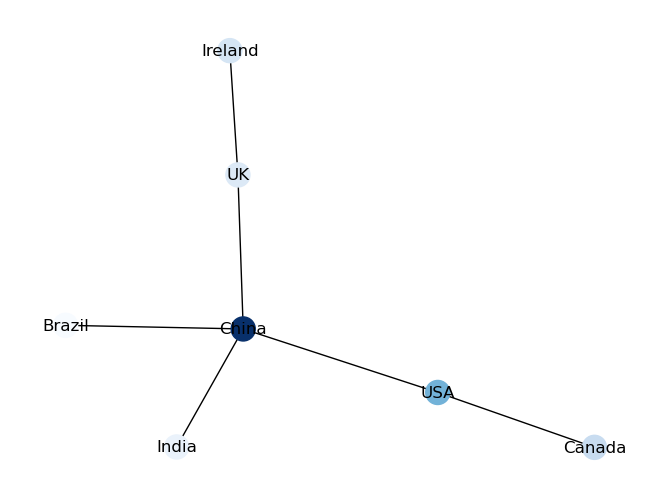

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

 
# Build a dataframe with your connections
# Remember that the "from" part should be linked with "to" part
# In our case, China is linked to India; UK to China; USA to Canada; China to USA; UK to Ireland; and Brazil to China

df = pd.DataFrame({ 'from':['China', 'UK', 'USA','China','UK', 'Brazil'], 
                   'to':['India', 'China', 'Canada','USA','Ireland','China']})
 
# Add data frame with characteristics for your nodes (in our case, stock volumes)
carac = pd.DataFrame({ 'ID':['China', 'UK', 'USA','India','Canada','Ireland','Brazil'], 
                      'myvalue':['150','25','75','15','40','30','5'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()

# We cannot give the 'myvalue' column to netowrkX directly: we need to arrange the order.
 
# We need to reorder carac to assign the correct color to each node (the larger the stock, the deeper the colour)
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# Plot the supply chain network providing a continuous color scale with cmap 
#(we will use Blue color, if you want to use Red colour write "Reds" intead of "Blues"
# if you want Green color, use "Greens", etc.):
nx.draw(G, with_labels=True, node_color=carac['myvalue'].astype(int), cmap=plt.cm.Blues)
plt.savefig('Network1.png')
plt.show()

### Step 3. Using colors for groups

Now let's plot the same thing using groupings and discrete color

* USA and Canada form a group
* UK and Ireland form a group
* China, India, and Brazil form their own groups

Each group should be plotted using a different colour


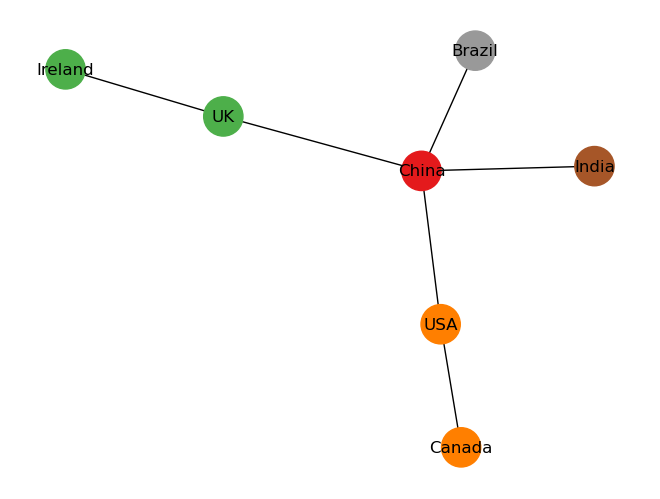

In [4]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections (you can copy-paste from the previous graph code)
df = pd.DataFrame({ 'from':['China', 'UK', 'USA','China','UK', 'Brazil'], 
                   'to':['India', 'China', 'Canada','USA','Ireland','China']})
 
# Add data frame with characteristics for your nodes (in our case, supply chain groups)
carac = pd.DataFrame({ 'ID':['China', 'UK', 'USA','India','Canada','Ireland','Brazil'], 
                      'myvalue':['group1','group2','group3','group4','group3', 'group2', 'group5'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
# The order of the node for networkX is the following order:
G.nodes()
# We cannot give the 'myvalue' column to netowrkX directly, we need to arrange the order.
 
# Now we reorder carac to assign the correct color to each node
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())
 
# And we need to transform our categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes (we will use node size = 800, you can select a lower or higher number):
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=800)
plt.savefig('Network2.png')

## Task 2: Interpreting characteristics of a network

Centrality algorithms measure how important a node is. This is not a clear definition, but it’s useful when we want to identify important (highly connected, in some cases) nodes or potential bottlenecks (barely connected, in some cases) in network.

A walk is a path which can go through a node several times. Centrality measures vary with the type of walk considered and the way of counting them.

<code>networkx</code> provides a series of functions https://networkx.org/documentation/stable/reference/functions.html and algorithms https://networkx.org/documentation/stable/reference/algorithms/index.htmlto understand and analyze a network.

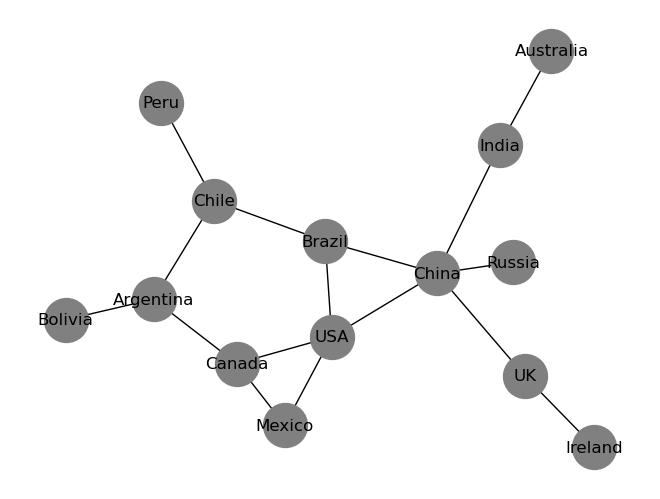

In [8]:
# Expanding on the previous network from Task 1 to include more nodes and countries
df2 = pd.DataFrame({'from':['Brazil', 'Argentina', 'Brazil', 'Chile', 'Canada', 'Argentina', 'Canada', 'Russia', 'Mexico', 'India'], 
                   'to':['USA', 'Chile', 'Chile', 'Peru', 'Mexico', 'Bolivia', 'Argentina', 'China', 'USA', 'Australia']})
edf = pd.concat([df, df2])
G = nx.from_pandas_edgelist(edf, 'from', 'to', create_using=nx.Graph())
nx.draw(G, with_labels=True, node_size=1000, node_color='grey')

### Step 1: Summary statistics

Methodology adapted from: https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5

In [9]:
# Compute number of nodes, edges and metrics
nodes = G.number_of_nodes()
edges = G.number_of_edges()
degrees = list(G.degree())

avg_degree = np.mean(np.array(degrees)[:,1].astype(float))
med_degree = np.median(np.array(degrees)[:,1].astype(float))
max_degree = max(np.array(degrees)[:,1].astype(float))
min_degree = np.min(np.array(degrees)[:,1].astype(float))

print("Number of nodes: " + str(nodes))
print("Number of edges: " + str(edges))
print("Maximum degree of a node: " + str(max_degree))
print("Minimum degree of a node: " + str(min_degree))
print("Average degree of nodes: " + str(avg_degree))
print("Median degree of nodes: " + str(med_degree))

Number of nodes: 14
Number of edges: 16
Maximum degree of a node: 5.0
Minimum degree of a node: 1.0
Average degree of nodes: 2.2857142857142856
Median degree of nodes: 2.0


> Ask yourself: What is your interpretation based on the summary statistics above?

### Step 2.1. Degree centrality
Degree centrality counts the number of walks of length 1 ending at node i. It is used to identify the most influential node.

In [10]:
degree_centrality = nx.degree_centrality(G)
dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

{'China': 0.38461538461538464,
 'USA': 0.3076923076923077,
 'Canada': 0.23076923076923078,
 'Brazil': 0.23076923076923078,
 'Argentina': 0.23076923076923078,
 'Chile': 0.23076923076923078,
 'India': 0.15384615384615385,
 'UK': 0.15384615384615385,
 'Mexico': 0.15384615384615385,
 'Ireland': 0.07692307692307693,
 'Peru': 0.07692307692307693,
 'Bolivia': 0.07692307692307693,
 'Russia': 0.07692307692307693,
 'Australia': 0.07692307692307693}

Text(0.5, 1.0, 'Degree Centrality')

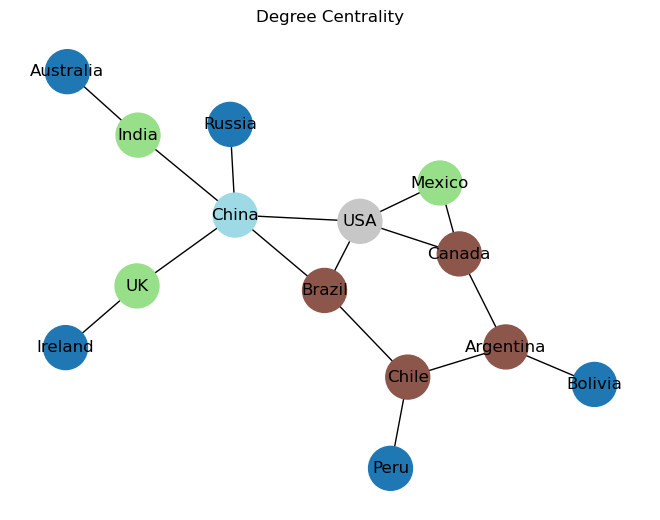

In [11]:
c_degree = list(degree_centrality.values())
nx.draw(G, cmap = plt.get_cmap('tab20'), node_color = c_degree, node_size=1000, with_labels=True)
plt.title('Degree Centrality')

### Step 2.2. Eigenvector centrality
Eigenvector Centrality is the number of walks of infinite length ending at node i. This gives more importance to nodes with well-connected neighbors.

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)
dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

{'USA': 0.49063893210129805,
 'China': 0.4682129426870086,
 'Brazil': 0.3977183466494126,
 'Canada': 0.3259087584558046,
 'Mexico': 0.2734196959264225,
 'Chile': 0.228906886258464,
 'Argentina': 0.20924199195741297,
 'India': 0.1765771265756874,
 'UK': 0.1765771265756874,
 'Russia': 0.15677923520649106,
 'Peru': 0.07664981908831708,
 'Bolivia': 0.0700652771719561,
 'Ireland': 0.059125895041576816,
 'Australia': 0.059125895041576816}

Text(0.5, 1.0, 'Eigenvector Centrality')

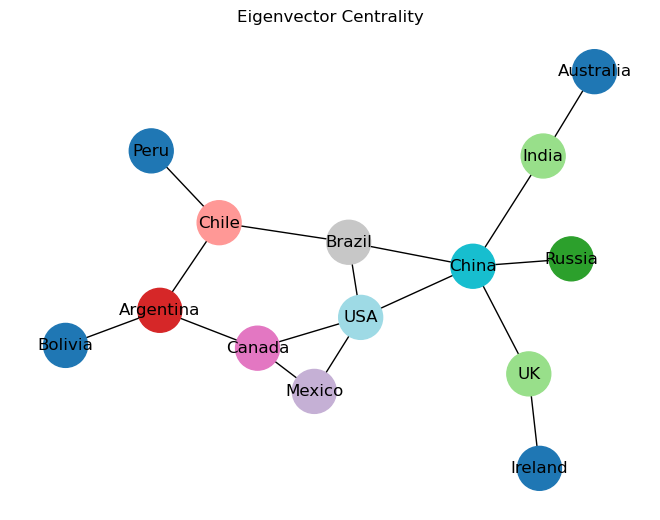

In [13]:
c_eigenvector = list(eigenvector_centrality.values())
nx.draw(G, cmap = plt.get_cmap('tab20'), node_color = c_eigenvector, node_size=1000, with_labels=True)
plt.title('Eigenvector Centrality')

### Step 2.3. Closeness centrality
Closeness Centrality detects nodes that are can spread information efficiently through a graph. It is inversely proportional to the sum of lengths of the shortest paths to other nodes.

In [14]:
closeness_centrality = nx.closeness_centrality(G)
dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

{'China': 0.52,
 'USA': 0.5,
 'Brazil': 0.5,
 'Canada': 0.41935483870967744,
 'Chile': 0.41935483870967744,
 'India': 0.37142857142857144,
 'UK': 0.37142857142857144,
 'Mexico': 0.37142857142857144,
 'Argentina': 0.3611111111111111,
 'Russia': 0.35135135135135137,
 'Peru': 0.3023255813953488,
 'Ireland': 0.2765957446808511,
 'Australia': 0.2765957446808511,
 'Bolivia': 0.2708333333333333}

Text(0.5, 1.0, 'Closeness Centrality')

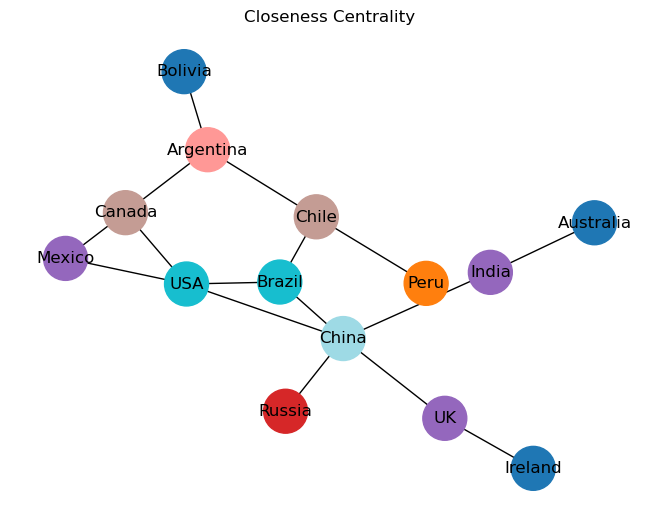

In [15]:
c_closeness = list(closeness_centrality.values())
nx.draw(G, cmap = plt.get_cmap('tab20'), node_color = c_closeness, node_size=1000, with_labels=True)
plt.title('Closeness Centrality')

### Step 2.4. Betweenness centrality
Betweenness Centrality detects the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another

In [16]:
betweenness_centrality = nx.betweenness_centrality(G)
dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

{'China': 0.6153846153846154,
 'USA': 0.2692307692307692,
 'Brazil': 0.2692307692307692,
 'Chile': 0.2564102564102564,
 'Argentina': 0.1923076923076923,
 'India': 0.15384615384615385,
 'UK': 0.15384615384615385,
 'Canada': 0.14102564102564102,
 'Ireland': 0.0,
 'Peru': 0.0,
 'Mexico': 0.0,
 'Bolivia': 0.0,
 'Russia': 0.0,
 'Australia': 0.0}

Text(0.5, 1.0, 'Betweenness Centrality')

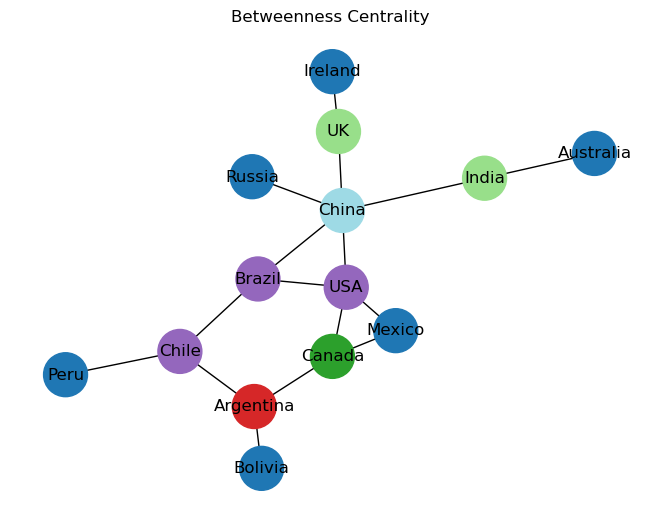

In [17]:
c_betweenness = list(betweenness_centrality.values())
nx.draw(G, cmap = plt.get_cmap('tab20'), node_color = c_betweenness, node_size=1000, with_labels=True)
plt.title('Betweenness Centrality')

### Centrality in summary:

Text(0.5, 1.0, 'Betweenness Centrality')

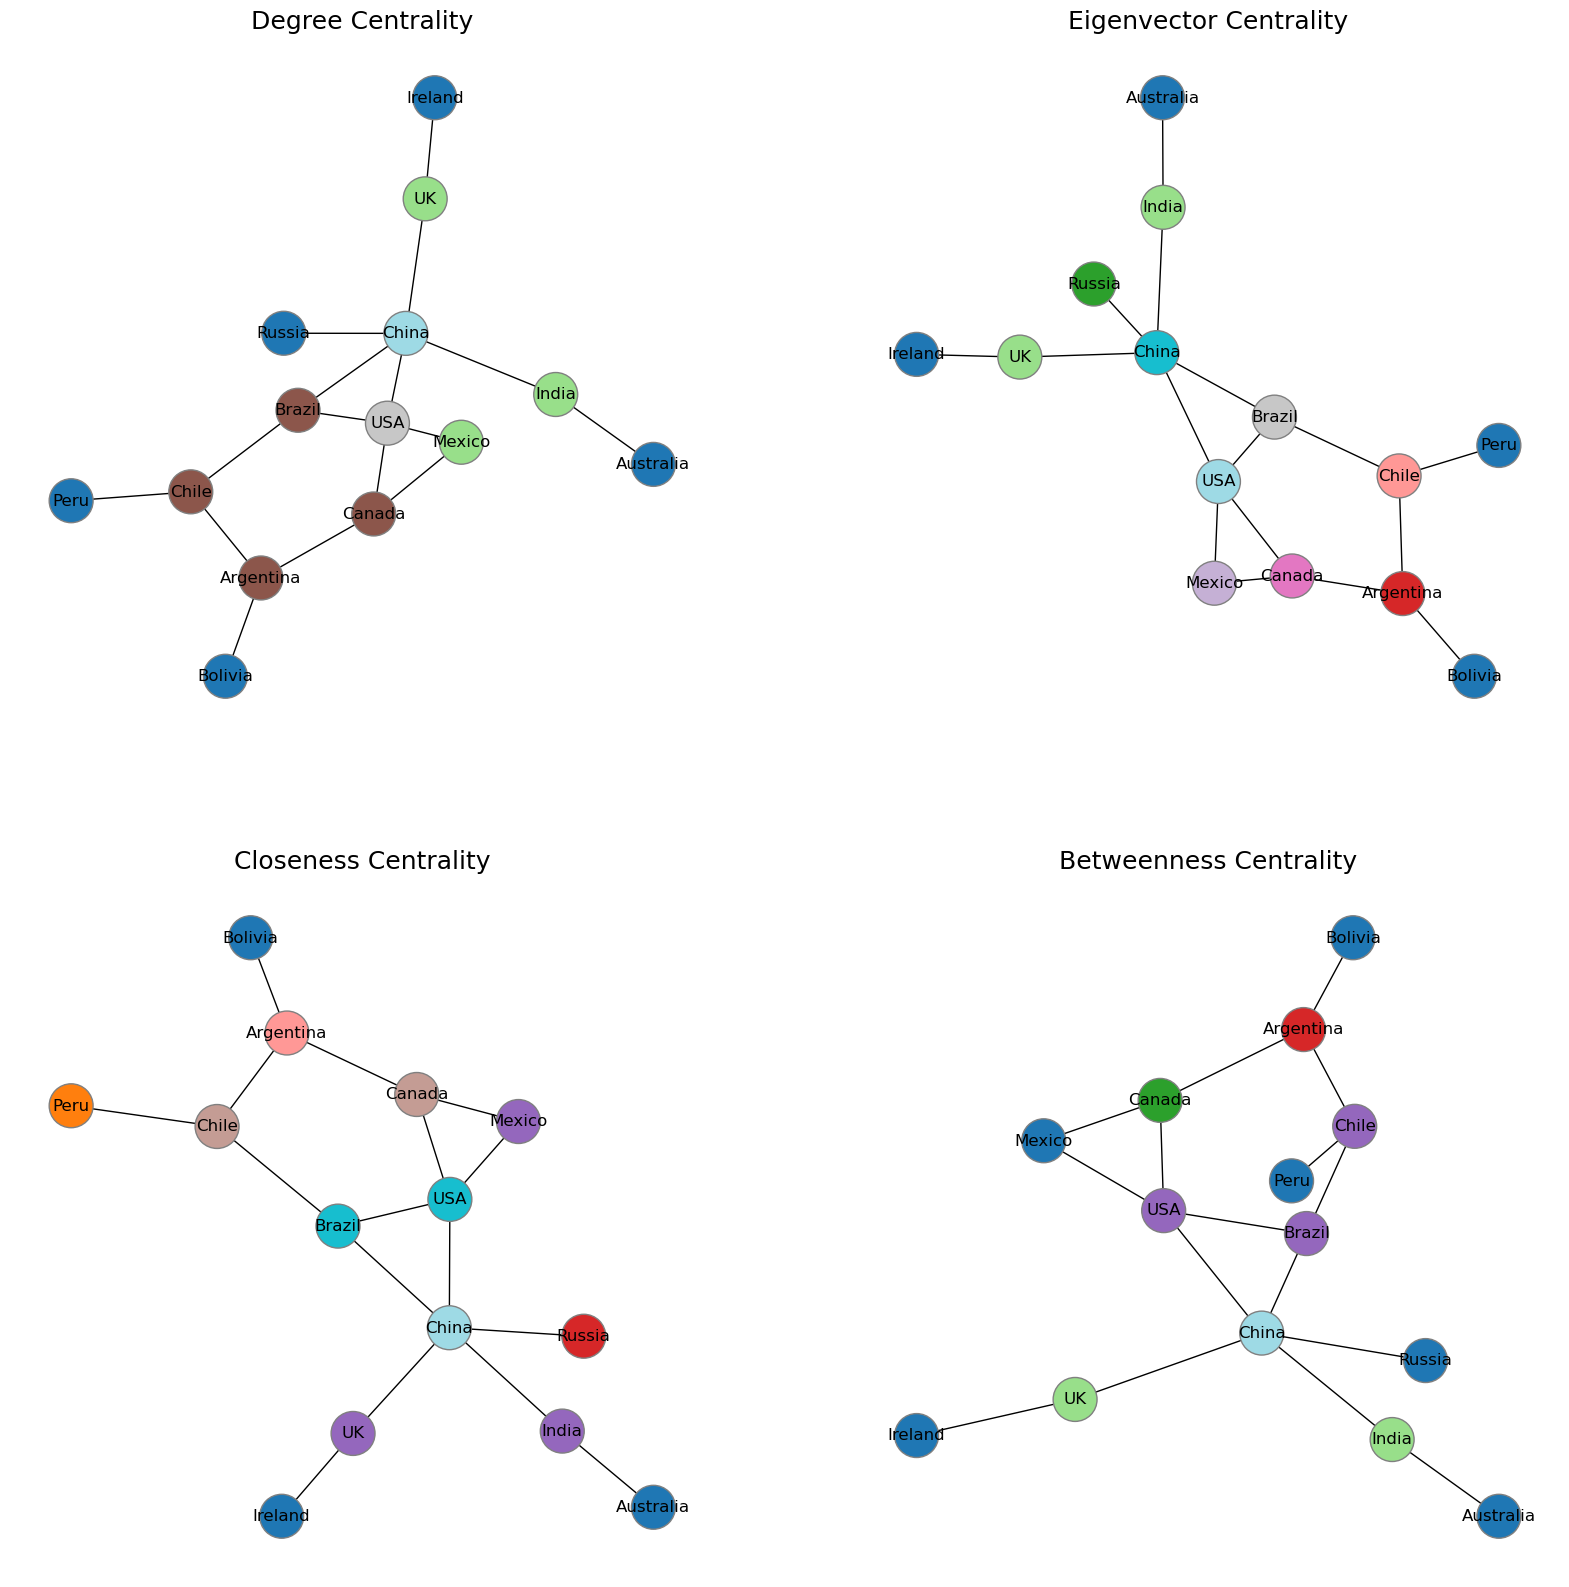

In [18]:
# Set node colors
cmap = plt.get_cmap('tab20')

# Set node sizes
node_sizes = 1000

# Set overall figure size
f = plt.figure(figsize=(20,20))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(G, with_labels=True, node_color=c_degree, cmap=cmap, 
        node_size = node_sizes, edgecolors='gray')
plt.title('Degree Centrality', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw(G, with_labels=True, node_color=c_eigenvector, cmap=cmap, 
               node_size = node_sizes, edgecolors='gray')
plt.title('Eigenvector Centrality', fontsize=18)

# Subplot 3
plt.subplot(2, 2, 3)
nx.draw(G, with_labels=True, node_color=c_closeness, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Closeness Centrality', fontsize=18)

# Subplot 4
plt.subplot(2, 2, 4)
nx.draw(G, with_labels=True, node_color=c_betweenness, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Betweenness Centrality', fontsize=18)

> Ask yourself:
> How would you describe the characteristics of a country (of your choice) based on the visualizations and metrics above?

## Task 3:  Chord Diagram using <code>bokeh</code> and <code>holoviews</code>

As demonstrated in Lecture example, we can use <code>bokeh</code> along with <code>holoviews</code> to draw Chord Diagrams.
Here is a quick example

### Step 1.   Importing Packages and Preparing data

We will use <code>bokeh</code>'s own datasets.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
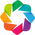

In [20]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

# data set
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index') 
links = pd.DataFrame(data['links'])

As been seen, the variable <code>nodes</code> is a <code>holoviews</code> defined <code>Dataset</code> constructed from the given DataFrame. The purpose of doing so is to add node labels and other information such that the Dataset contains with a key dimension of node indices.

You may explore the information inside the data and link as follows

In [21]:
nodes_DataFrame = pd.DataFrame(data['nodes'])
nodes_DataFrame.head()

,name,group
0,Myriel,1
1,Napoleon,1
2,Mlle.Baptistine,1
3,Mme.Magloire,1
4,CountessdeLo,1


In [22]:
links = pd.DataFrame(data['links'])
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   source  254 non-null    int64
 1   target  254 non-null    int64
 2   value   254 non-null    int64
dtypes: int64(3)
memory usage: 6.1 KB


### Step 2.  Draw the diagram with added feature

In [23]:
# chord diagram
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)

## Task 4:  Sankey Diagram using <code>bokeh</code> and <code>holoviews</code>

In this example (adopted from holoviews examples), we want to show Careers paths. The following data is extracted from the 2010 Royal Society policy report entitled “The Scientific Century: securing our future prosperity” https://royalsociety.org/~/media/royal_society_content/policy/publications/2010/4294970126.pdf. 

In fact, we have known that 53% of the PhD Students went to a Career Outside Science, 47% of the them got an Early Career Researcher. 17% of those had been in an Early Career Researcher had a Non-Academic Research and 30% became a Permanent Research Staff. Only 22% of the last category got a Professor position which represents only 0.45% of the PhD students.

source: https://malouche.github.io/notebooks/Sankey_graphs.html

### Step 1. Import Packages and Preparing data

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
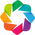

In [24]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=100)

In [25]:
careers = ["PhD", "Career Outside Science",  "Early Career Researcher", "Research Staff",
         "Permanent Research Staff",  "Professor",  "Non-Academic Research"]

nodes = pd.DataFrame({'label':careers})  # make a DataFrame for nodes

nodes = hv.Dataset(nodes, 'index')     # add an index column explicitly

According to the order, we know that "PhD" has index value 0, "Career Outside Science" has index value 1, ...  Based on these indices and the information, the career path edge can be defined as three elements tuples instead of using rows of a DataFrame.  In the following code, there is an edge from "PhD" (index 0) to "Career Outside Science" (index 1) with 53%, which is represented as a tuple (0, 1, 53).


In [26]:
edges = [
    (0, 1, 53), 
    (0, 2, 47), 
    (2, 6, 17), 
    (2, 3, 30), 
    (3, 1, 22.5), 
    (3, 4, 3.5), 
    (3, 6, 4.), 
    (4, 5, 0.45)   
]
value_dim = hv.Dimension('Percentage', unit='%')  # explain the value as percentage

### Step 2.  Draw the diagram

Once the data is ready, it is straightforward to draw the diagram

In [27]:
hv.Sankey((edges, nodes), ['From', 'To'], vdims=value_dim).options(
    label_index='label', label_position='left', width=900, height=600, edge_color_index='To'
)

:Sankey   [From,To]   (Percentage)

<hr style="border:1px solid gray"> <center><h1> Alternative Task </h1></center><hr style="border:1px solid gray">

## Task:  Graph layout in <code>networkx</code>

Adopted from the example in https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf.

### Step 1.  Define the Graph Data  

We normally define all the edges and node information (features) in two different DataFrames.

In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib


# Specify data and attributes
edges = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2', '3', '1', 'Center', 'Center', 
                                       'Center', 'Center', 'Center', 'Center', 'Center'], 
                              'to': ['B', 'C', 'D', 'C', 'C', 'A', '3', '1', '3', '2', 'A', 'B', 
                                     'C', 'D']})

# Create DF for node characteristics
nodes = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2', '3', 'Center'], 
                      'type':['Letter','Letter', 'Letter', 'Letter', 'Number', 'Number', 
                              'Number', 'Center']})


### Step 2.   Creating <code>networkx</code> Graph Object

Graph can be simply created from edge information stored in a <code>pandas</code> DataFrame

In [29]:
# Create graph object
G = nx.from_pandas_edgelist(edges, 'from', 'to', create_using=nx.Graph())

### Step 3. Preparing Node Characteristic Information

In [30]:
# Make types into categories
nodes= nodes.set_index('ID')
nodes=nodes.reindex(G.nodes())

nodes['type']=pd.Categorical(nodes['type'])
nodes['type'].cat.codes

ID
A         1
B         1
C         1
D         1
1         2
2         2
3         2
Center    0
dtype: int8

### Step 4. Preparing Drawing Information and Outputing Graphs

Text(0.5, 1.0, 'Spectral Layout')

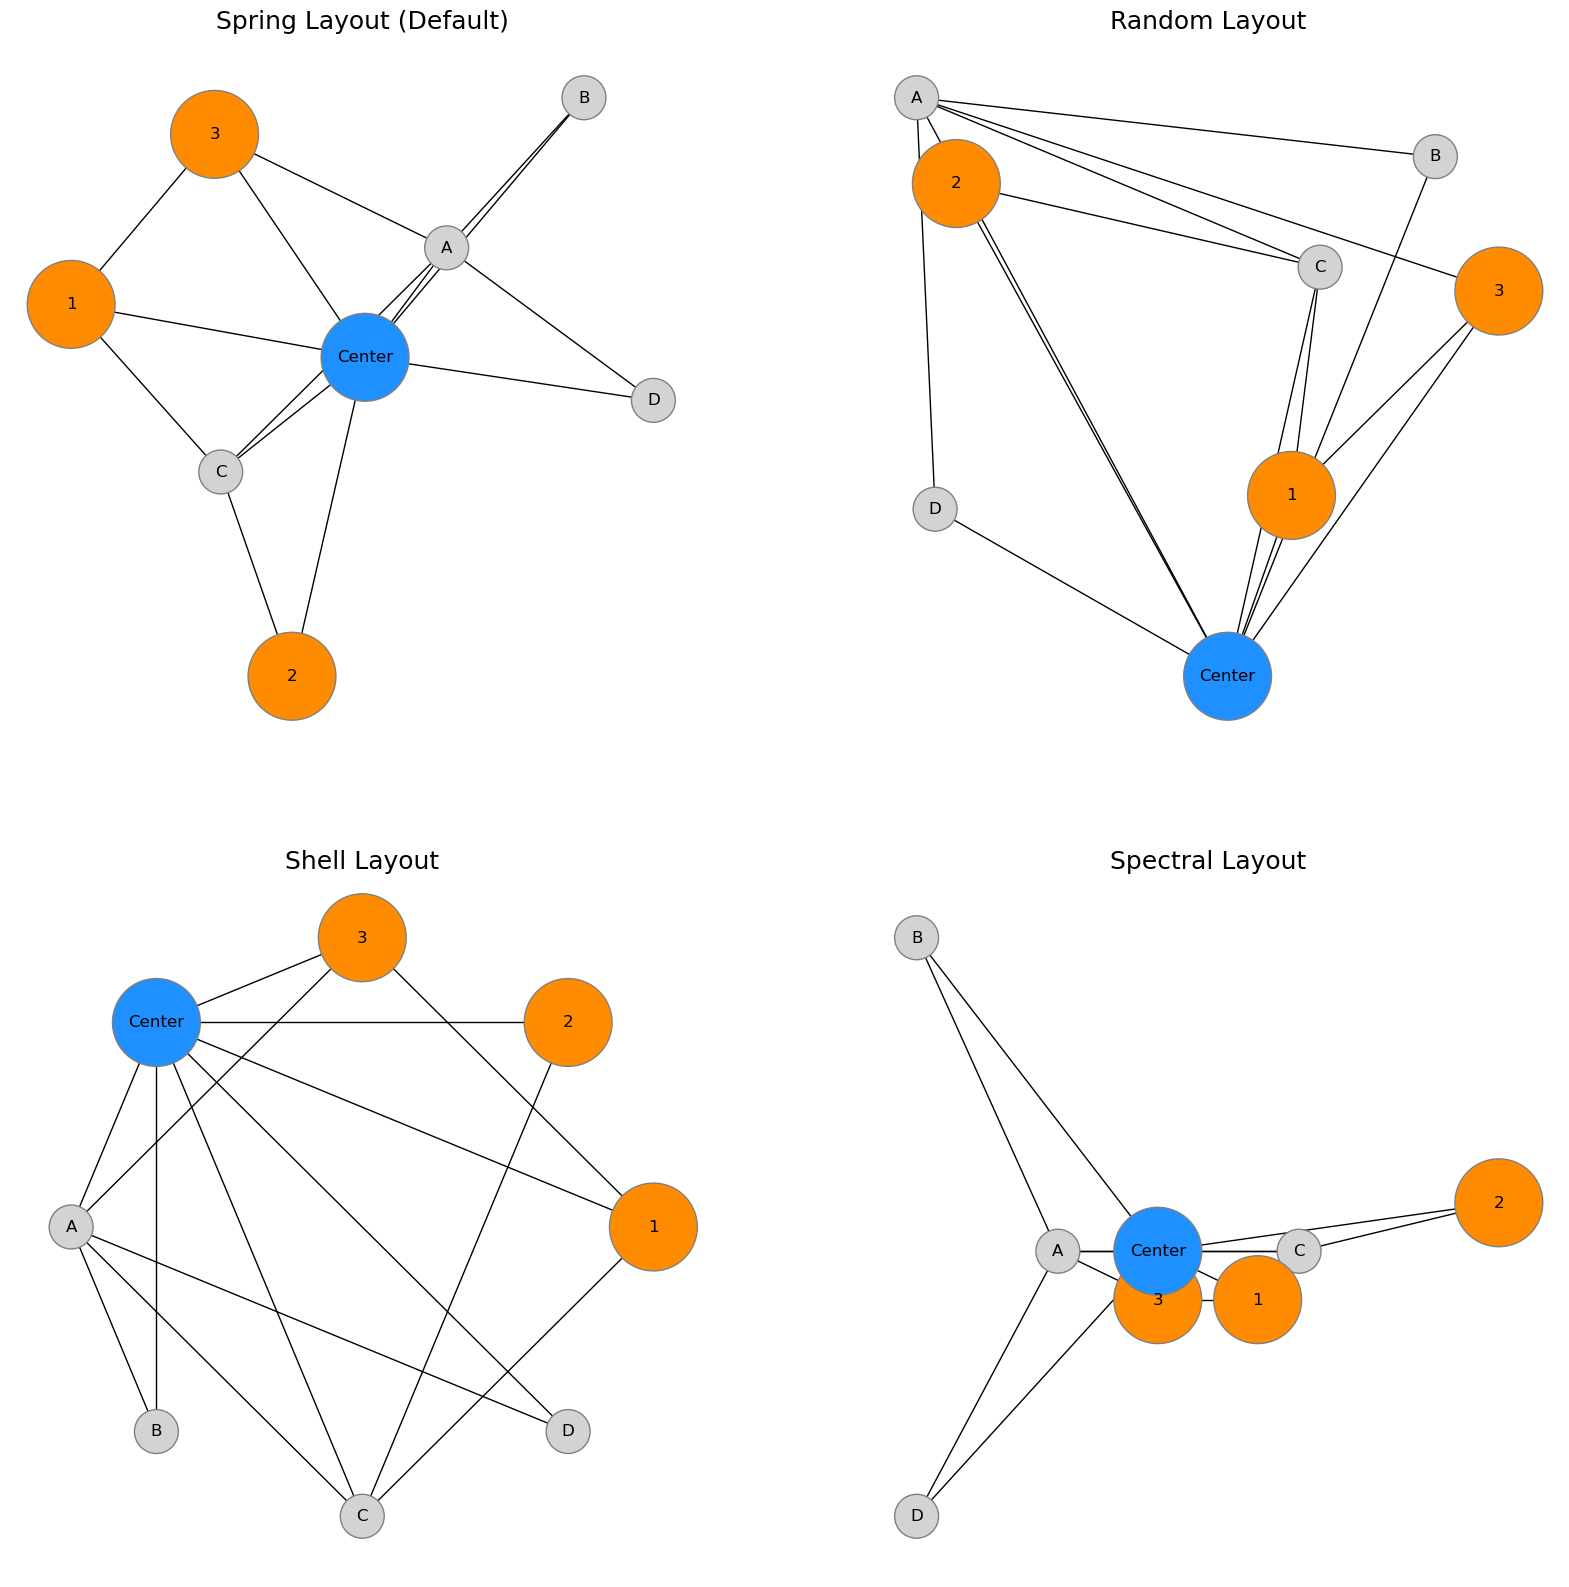

In [31]:
# Set node colors
cmap = matplotlib.colors.ListedColormap(['dodgerblue', 'lightgray', 'darkorange'])

# Set node sizes
node_sizes = [4000 if entry != 'Letter' else 1000 for entry in nodes.type]

# Set overall figure size
f = plt.figure(figsize=(20,20))
f.tight_layout()

# Create Layouts

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(G, with_labels=True, node_color=nodes['type'].cat.codes, cmap=cmap, 
        node_size = node_sizes, edgecolors='gray')
plt.title('Spring Layout (Default)', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw_random(G, with_labels=True, node_color=nodes['type'].cat.codes, cmap=cmap, 
               node_size = node_sizes, edgecolors='gray')
plt.title('Random Layout', fontsize=18)

# Subplot 3
plt.subplot(2, 2, 3)
nx.draw_shell(G, with_labels=True, node_color=nodes['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Shell Layout', fontsize=18)

# Subplot 4
plt.subplot(2, 2, 4)
nx.draw_spectral(G, with_labels=True, node_color=nodes['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Spectral Layout', fontsize=18)

### Summary

1. A graph can be created in <code>networkx</code> according to a DataFrame whose rows correspond to the edges in the graph and two columns define the nodes.

2. The nodes of the graph is also defined by another DataFrame whose Index should be same as the node "names" (or IDs) in the edge DataFrame columns, and a categorical column as node types.  Dont forget convert the categorical values (sometimes string values) into numeric values as code.

3. To draw the graph, the characteristic or style such as node colors, node sizes should be provided to the drawing funciton <code>networkx.draw</code> or one of four defined layouts such as <code>draw</code>, <code>draw_random</code>, <code>draw_shell</code> and <code>draw_spectral</code>. 